## 导入数据集
此处输入 **建模数据和陪跑数据(如果没有陪跑则无需导入)**  
1. **建模数据格式：**（需有TARGET(目前脚本只支持二分类模型,目标值为1,非目标值为0)、(DATE(格式为yyyy-mm-dd或yyyy-mm))以及变量X1、...、Xn） 

| TARGET | (DATE) | X1 | ... | Xn |
|----|----|----|----|----|
|1|2018-12(-10)|x11|...|x1n|
|0|2018-12(-11)|x12|...|x2n|

2. **陪跑数据格式：**（需有DATE(格式为yyyy-mm-dd或yyyy-mm)以及变量X1、...、Xn） 

| DATE | X1 | ... | Xn |
|----|----|----|----|
|2018-12(-10)|x11|...|x1n|
|2018-12(-11)|x12|...|x2n|


In [1]:
import numpy as np
import pandas as pd

In [2]:
with open(r'./usage/data/application_train.csv') as data:
    data = pd.read_csv(data, low_memory=False)
data.columns = [x.upper() for x in data.columns]

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DATE
0,145457,0,Cash loans,M,Y,N,0,288000.0,242595.0,10813.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,2018-05
1,128979,0,Cash loans,F,N,N,0,94500.0,646920.0,20866.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2018-05
2,145448,0,Cash loans,M,Y,Y,1,225000.0,183294.0,14823.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,2018-03
3,294475,0,Cash loans,M,Y,N,0,180000.0,260640.0,20169.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,2018-04
4,216609,0,Revolving loans,M,Y,Y,1,112500.0,180000.0,9000.0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,2018-03


In [3]:
with open(r'./usage/data/application_pp.csv') as pp_data:
    pp_data = pd.read_csv(pp_data, low_memory=False)
pp_data.columns = [x.upper() for x in pp_data.columns]

pp_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DATE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2018-06
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2018-11
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,2018-09
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2018-06
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-08


## auto_modeling: 自动化建模脚本

输入规定格式数据集,可全自动化或半自动化建模

### 方法

建模流程主要通过以下几种方法完成:

1. 数据集划分
2. 特征筛选
3. 超参数优化
4. 可视化结果报表

### 用法

参考auto\_modeling\_usage\_自定义.ipynb和auto\_modeling\_usage\_全自动.ipynb了解如何使用
 


### 依赖

* numpy = 1.16.2
* pandas = 0.24.2
* scikit-learn = 0.20.3
* scipy = 1.2.1
* matplotlib = 3.0.3
* seaborn = 0.9.0
* warnings
* time
* gc
* lightgbm = 2.2.3
* xgboost = 0.82
* sklearn_pandas = 1.8.0
* sklearn2pmml = 0.43.0
* hyperopt = 0.1.2 (可使用贝叶斯优化的tpe算法和随机搜索优化超参数,官方文档:[hyperopt](https://github.com/hyperopt/hyperopt))
* bayesian-optimization = 1.0.1 (可使用贝叶斯的高斯过程算法优化超参数,官方文档:[Bayesian Optimization](https://github.com/fmfn/BayesianOptimization))
* plotly = 3.7.1 (生成交互式可视化报表,官方文档:[plotly](https://plot.ly/python/))
* shap = 0.28.5 (解释机器学习模型,官方文档:[shap](https://github.com/slundberg/shap))
* codecs
* os
* sys
* webbrowser


### 结构

> ### auto_modeling
> * \_\_init\_\_.py
> * data\_split.py
>     > data\_split -- 数据集划分
> * feature\_select.py
>     > feature\_select -- 特征选择
> * para\_optimize.py
>     > para\_optimize -- 超参数优化
> * result\_report.py
>     > result\_report -- 可视化结果报表
> * other\_function.py
>     > get\_coltype\_datalist -- 处理数据集、区分变量类型
>     
>     > get\_mapper -- 封装变量处理方法
>     
>     > get\_learning\_curve -- 绘制学习曲线
>     
>     > get\_bset\_para\_model -- 选择模型并建立
>     
>     > get\_pp\_data\_trans -- 处理陪跑数据集
>     
>     > get\_group\_final -- 按照正态分布分组的方案
>
>     > get\_result\_table -- 各组/各等分情况
>     
>     > get\_group\_score -- 各组预测结果阈值
>     
>     > get\_model\_file -- 输出模型文件
>
>     > get\_index\_values -- 计算各指标值
> 
>     > get\_data\_trans -- 处理其他数据集
> 
>     > read\_model\_pkl -- 读取pkl文件
> 
>     > modifying\_pmml -- 修改pmml文件
> 
>     > get\_model\_explain -- 回溯模型解释器
> 
>     > get\_predict\_explain -- 获取单样本预测值解释
>
>     > get\_model\_predict -- 获取模型预测结果(pipeline、pkl文件、pmml文件)
> * full\_automatic.py
>     > full\_automatic\_simplet -- 简单模式全自动建模
>     
>     > full\_automatic\_complete -- 完整模式全自动建模

In [4]:
import auto_modeling as am

## simple模式

>> Step1: 数据集划分
>> 数据集划分成功,无跨时间测试集
>> 训练集样本数: 43051
>> 测试集样本数: 18451
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 39583  占比: 91.94%
   训练集TARGET为 1 的数量: 3468  占比: 8.06%
>> --------------------------------------------------------
>> Step2: 特征选择
>> 根据缺失率删除 0 个变量
>> 根据同质性删除 2 个变量
>> 根据最大计数类别删除 0 个变量
>> 根据相关性删除 0 个变量
>> 根据特征重要度最终保留 50 个变量
>> 具体保留变量如下:
   ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_ID_PUBLISH', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'SK_ID_CURR', 'OCCUPATION_TYPE', 'OWN_CAR_AGE', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TOTALAREA_MODE', 'CODE_GENDER', 'NONLIVINGAREA_AVG', 'NAME_EDUCATION_TYPE', 'YEARS_BEGINEXPLUATATION_AVG', 'LANDAREA_AVG', 'NAME_INCOME_TYPE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3', 'LANDAREA_MODE', 'BASEMENTAREA_AVG', 'APARTMENTS_AVG', 'REGION_RATING_CLIENT_W_CITY', 'BASEMENTA

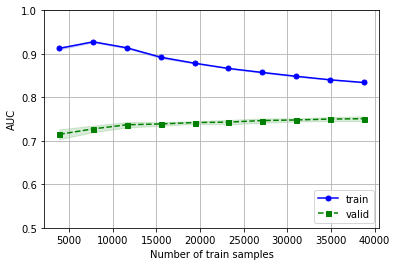

>> LightGBM 模型效果如下:
>> 训练KS值: 0.4997  AUC值: 0.8297
>> 测试KS值: 0.3567  AUC值: 0.739
>> --------------------------------------------------------
>> Step4: 可视化结果报表
>> 模型训练样本情况绘制完成
>> 模型分组排序情况绘制完成
>> 模型解释绘制完成
>> 可视化报表已输出
>> --------------------------------------------------------
>> 模型建立完成,模型文件已输出
>> --------------------------------------------------------


In [5]:
# 只有训练、测试集，无跨时间和陪跑，不按照重要性迭代变量子集，报表不绘制单变量归因图，保存未封装的模型和keep_cols
am.full_automatic_simple(data, test_size=0.3, time_test_type=False, attribution=False,
                         report_file=r'./usage/result/result_report_simple.html', 
                         pkl_file=r'./usage/result/model_simple.pkl', pmml_file=r'./usage/result/model_simple.pmml',
                         model_file=r'./usage/result/model_simple.m', keep_cols_file=r'./usage/result/keep_cols_simple.txt')

### 模型回溯

In [6]:
# 划分数据集
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(
    data, test_size=0.3, time_test_type=False)

>> 数据集划分成功,无跨时间测试集
>> 训练集样本数: 43051
>> 测试集样本数: 18451
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 39583  占比: 91.94%
   训练集TARGET为 1 的数量: 3468  占比: 8.06%


#### 简单回溯

In [7]:
# 读取pkl模型
model_pkl = am.read_model(r'./usage/result/model_simple.pkl')
# 转换数据集
X_test_trans = am.get_data_trans(X_test, keep_cols=r'./usage/result/keep_cols_simple.txt')

# 预测
model_pkl.predict_proba(X_test_trans)

array([[0.96038312, 0.03961688],
       [0.94497163, 0.05502837],
       [0.8719784 , 0.1280216 ],
       ...,
       [0.96076134, 0.03923866],
       [0.97216418, 0.02783582],
       [0.94661111, 0.05338889]])

#### 复杂回溯

In [8]:
# 使用Pipeline对象预测
am.get_model_predict(model_pkl, X_test_trans).head()

,predict
21932,0.039617
25017,0.055028
33990,0.128022
13304,0.139267
31268,0.012590


In [9]:
# 使用pmml文件预测，并查看分组
# 因为是调用jar进行预测，速度较慢
am.get_model_predict(r'./usage/result/model_simple.pmml', X_test_trans, group_score=[0.2, 0.4, 0.8]).head()

已计算完成1000个样本
已计算完成2000个样本
已计算完成3000个样本
已计算完成4000个样本
已计算完成5000个样本
已计算完成6000个样本
已计算完成7000个样本
已计算完成8000个样本
已计算完成9000个样本
已计算完成10000个样本
已计算完成11000个样本
已计算完成12000个样本
已计算完成13000个样本
已计算完成14000个样本
已计算完成15000个样本
已计算完成16000个样本
已计算完成17000个样本
已计算完成18000个样本
全部样本计算完成


,predict,group
21932,0.039617,A
25017,0.055028,A
33990,0.128022,A
13304,0.139267,A
31268,0.012590,A


### 单样本预测结果解释

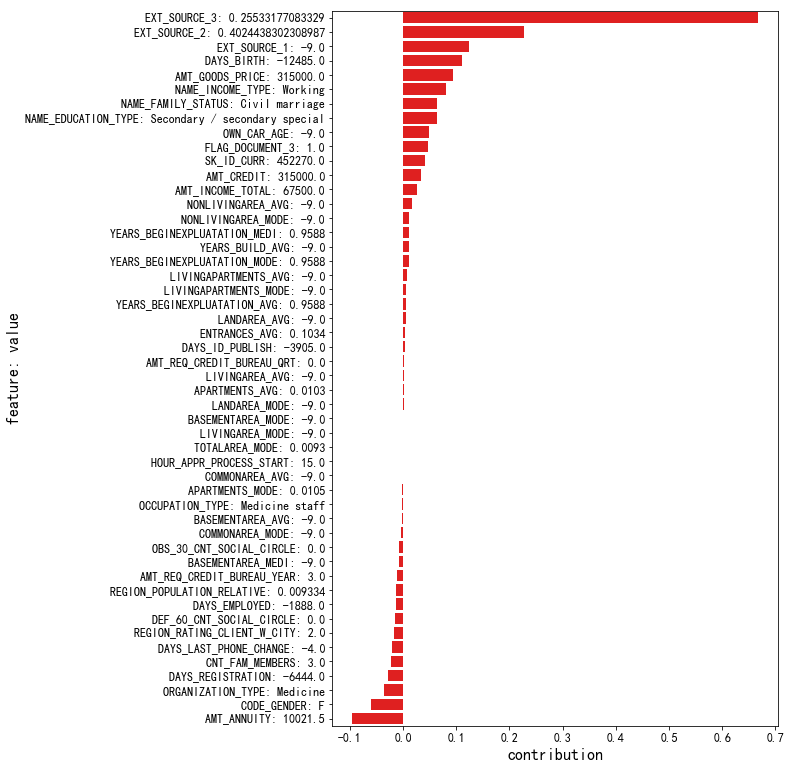

In [10]:
X_train_trans = am.get_data_trans(X_train, keep_cols=r'./usage/result/keep_cols_simple.txt')

# 创建模型解释器，如果不传入keep_cols，X_train则需为按照keep_cols保留完变量的训练集特征空间
model_explain = am.get_model_explain(X_train, Y_train, model=r'./usage/result/model_simple.m',
                                     keep_cols=r'./usage/result/keep_cols_simple.txt')

# 解释测试集第11个样本的预测值
# contribution为特征对预测值的贡献，也就是特征与预测值-预测期望的相关关系，正值为正相关，负值为负相关
# 可以看到下面样本的CREDIT_SCORE有很大的正贡献，既该值很大的拉高了预测值（预测为1的概率）
predict_explain = am.get_predict_explain(model_explain, sample=X_test_trans.iloc[10])

In [11]:
# 查看返回的解释详细表
predict_explain.head(10)

,value,contribution
EXT_SOURCE_3,0.255332,0.667672
EXT_SOURCE_2,0.402444,0.226809
EXT_SOURCE_1,-9,0.12304
DAYS_BIRTH,-12485,0.111117
AMT_GOODS_PRICE,315000,0.094195
NAME_INCOME_TYPE,Working,0.0798795
NAME_FAMILY_STATUS,Civil marriage,0.0631857
NAME_EDUCATION_TYPE,Secondary / secondary special,0.0630535
OWN_CAR_AGE,-9,0.0482065
FLAG_DOCUMENT_3,1,0.0462062


## complete模式

>> Step1: 数据集划分
>> 数据集自动划分成功,按时间升序,后50%样本作为跨时间测试集
>> 训练集样本数: 17122
>> 测试集样本数: 7339
>> 跨时间测试集样本数: 37041
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 15744  占比: 91.95%
   训练集TARGET为 1 的数量: 1378  占比: 8.05%
>> --------------------------------------------------------
>> Step2: 特征选择
>> 根据缺失率删除 0 个变量
>> 根据同质性删除 21 个变量
>> 根据最大计数类别删除 0 个变量
>> 根据相关性删除 0 个变量
>> 根据iv值删除 26 个变量
>> 特征重要度迭代次数 |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■|   根据条件提前停止迭代
>> 根据特征重要度最终保留 25 个变量
>> 具体保留变量如下:
   ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'ORGANIZATION_TYPE', 'SK_ID_CURR', 'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'AMT_CREDIT', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE', 'REGION_POPULATION_RELATIVE', 'NONLIVINGAREA_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'HOUR_APPR_PROCESS_START', 'LIVINGAREA_MODE', 'YEARS_BUILD_AVG', 'BASEMENTAREA_MODE', 'NAME_EDUCATION_TYPE', 'APARTMENTS_AVG']
>> -------------------------

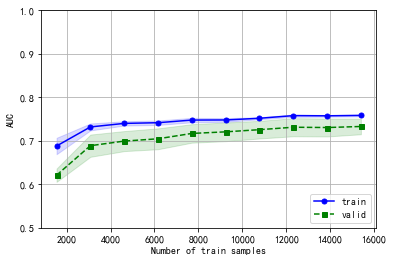

>> XGBoost 模型效果如下:
>> 训练KS值: 0.3926  AUC值: 0.7607
>> 测试KS值: 0.3743  AUC值: 0.7329
>> 跨时间测试KS值: 0.3408  AUC值: 0.7304
>> --------------------------------------------------------
>> Step4: 可视化结果报表
>> 开始尝试分组方案 [■■■■■■■■■■■■]
>> 共尝试了48种分组方案,最优分组方案为 [21, 51, 79]
>> 该分组方案各组数目占比累加值为 [0.21, 0.49, 0.79]
>> 模型训练样本情况绘制完成
>> 模型分组排序情况绘制完成
>> 跨时间分组分布绘制完成
>> 模型解释绘制完成
>> 可视化报表已输出
>> --------------------------------------------------------
>> 模型建立完成,模型文件已输出
>> --------------------------------------------------------


In [12]:
# 自动划分跨时间测试，训练测试7:3，传入陪跑数据
# 同质性设置0.95，类别变量最大计数类别设置为0.01，iv值设置为0.02，其他为默认
# 封装管道支持缺失值
# 选择模型为XGBoost、LightGBM和GBDT
# 设置交叉验证惩罚权重1
# 结果展示的分组使用正态分组，组数4组，陪跑数据集作为正态标准
# 更改输出文件路径和名字，pmml文件忽略无效值
am.full_automatic_complete(data, test_size=0.3, time_test_type=True, pp_data=pp_data, homogeny=0.95, category=0.01, iv=0.02,
                           missing_in=True, model_list=['xgb', 'lgbm', 'gbdt'], penalty_weight=1, penalty_space=0.02,
                           group_method='normal', group_nums=4, group_norm='pp', report_file=r'./usage/result/result_report_complete.html',
                           pkl_file=r'./usage/result/model_complete.pkl', pmml_file=r'./usage/result/model_complete.pmml')

### 修改pmml文件

#### 自动化后单独修改

In [13]:
# 划分数据集
X_train, Y_train, X_test, Y_test, X_time_test, Y_time_test = am.data_split(
    data, test_size=0.3, time_test_type=True)

>> 数据集自动划分成功,按时间升序,后50%样本作为跨时间测试集
>> 训练集样本数: 17122
>> 测试集样本数: 7339
>> 跨时间测试集样本数: 37041
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 15744  占比: 91.95%
   训练集TARGET为 1 的数量: 1378  占比: 8.05%


In [14]:
# 转换数据集
keep_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'ORGANIZATION_TYPE', 'SK_ID_CURR', 'DAYS_EMPLOYED', 'AMT_ANNUITY', 
             'DAYS_BIRTH', 'DAYS_REGISTRATION', 'AMT_CREDIT', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 
             'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE', 'REGION_POPULATION_RELATIVE', 'NONLIVINGAREA_MEDI', 
             'YEARS_BEGINEXPLUATATION_AVG', 'HOUR_APPR_PROCESS_START', 'LIVINGAREA_MODE', 'YEARS_BUILD_AVG', 'BASEMENTAREA_MODE', 
             'NAME_EDUCATION_TYPE', 'APARTMENTS_AVG']
X_train_trans = am.get_data_trans(X_train, keep_cols)
X_test_trans = am.get_data_trans(X_test, keep_cols)
X_time_test_trans = am.get_data_trans(X_time_test, keep_cols)
pp_data_trans = am.get_pp_data_trans(pp_data, keep_cols)

# 陪跑数据集有提示存在inf值，该值在部分模型会无法通过，但该例子使用的是LightGBM，可以不修改，如要修改用下面代码
datalist = [[X_train_trans, Y_train], [X_test_trans, Y_test], [X_time_test_trans, Y_time_test], [pp_data_trans]]

In [15]:
# 获取各组预测结果阈值
group_score = am.get_group_score(datalist, model_pkl=r'./usage/result/model_complete.pkl', group_final=[21, 51, 79], group_norm='pp')
group_score

[0.038104, 0.059942, 0.110393, 1]

In [16]:
# 修改pmml
am.modifying_pmml(pmml_file_in=r'./usage/result/model_complete.pmml',
                  pmml_file_out=r'./usage/result/model_complete_modifying.pmml',
                  group_score=group_score, rank_name=['A', 'B', 'C', 'D'])

>> PMML文件修改完成,按照各组阈值增加新输出Group


In [17]:
# 如果想换其他分组方案并查看效果可运行下面代码
group_final = am.get_group_final(datalist, model_pkl=r'./usage/result/model_complete.pkl', group_nums=6, group_norm='pp')
result_rank, pp_rank = am.get_result_table(datalist, model_pkl=r'./usage/result/model_complete.pkl',
                                           group_method=group_final, group_norm='pp')
result_rank

>> 开始尝试分组方案 [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]
>> 共尝试了243种分组方案,最优分组方案为 [11, 26, 51, 74, 89]
>> 该分组方案各组数目占比累加值为 [0.11, 0.26, 0.49, 0.74, 0.89]


,训练集总数,训练集目标数,训练集分组占比,训练集目标占比,测试集总数,测试集目标数,测试集分组占比,测试集目标占比,跨时间测试集总数,跨时间测试集目标数,跨时间测试集分组占比,跨时间测试集目标占比,陪跑总数,陪跑分组占比,预测结果阈值
rank,,,,,,,,,,,,,,,
1.0,1970,518,0.1151,0.2629,839,174,0.1143,0.2074,4254,1001,0.1148,0.2353,4602,0.11,1.0000
2.0,2520,337,0.1472,0.1337,1129,158,0.1538,0.1399,5610,708,0.1515,0.1262,6275,0.15,0.1566
3.0,3969,270,0.2318,0.0680,1697,139,0.2312,0.0819,8680,699,0.2343,0.0805,9622,0.23,0.0960
4.0,4239,179,0.2476,0.0422,1784,58,0.2431,0.0325,9157,398,0.2472,0.0435,10458,0.25,0.0599
5.0,2608,48,0.1523,0.0184,1094,32,0.1491,0.0293,5490,151,0.1482,0.0275,6275,0.15,0.0411
6.0,1816,26,0.1061,0.0143,796,15,0.1085,0.0188,3850,67,0.1039,0.0174,4602,0.11,0.0320


#### full_automatic_complete中传入pmml_modify=True直接修改

>> Step1: 数据集划分
>> 数据集自动划分成功,按时间升序,后50%样本作为跨时间测试集
>> 训练集样本数: 17122
>> 测试集样本数: 7339
>> 跨时间测试集样本数: 37041
>> 训练集目标情况如下:
   训练集TARGET为 0 的数量: 15744  占比: 91.95%
   训练集TARGET为 1 的数量: 1378  占比: 8.05%
>> --------------------------------------------------------
>> Step2: 特征选择
>> 根据缺失率删除 0 个变量
>> 根据同质性删除 21 个变量
>> 根据最大计数类别删除 0 个变量
>> 根据相关性删除 0 个变量
>> 根据iv值删除 26 个变量
>> 特征重要度迭代次数 |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■|   根据条件提前停止迭代
>> 根据特征重要度最终保留 25 个变量
>> 具体保留变量如下:
   ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'ORGANIZATION_TYPE', 'SK_ID_CURR', 'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'AMT_CREDIT', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE', 'REGION_POPULATION_RELATIVE', 'NONLIVINGAREA_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'HOUR_APPR_PROCESS_START', 'LIVINGAREA_MODE', 'YEARS_BUILD_AVG', 'BASEMENTAREA_MODE', 'NAME_EDUCATION_TYPE', 'APARTMENTS_AVG']
>> -------------------------

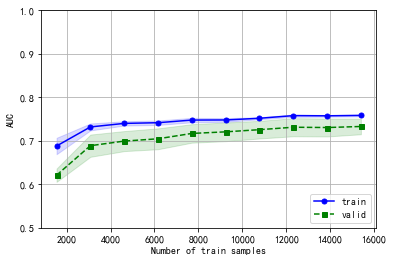

>> XGBoost 模型效果如下:
>> 训练KS值: 0.3926  AUC值: 0.7607
>> 测试KS值: 0.3743  AUC值: 0.7329
>> 跨时间测试KS值: 0.3408  AUC值: 0.7304
>> --------------------------------------------------------
>> 模型建立完成,模型文件已输出
>> 开始尝试分组方案 [■■■■■■■■■■■■]
>> 共尝试了48种分组方案,最优分组方案为 [21, 51, 79]
>> 该分组方案各组数目占比累加值为 [0.21, 0.49, 0.79]
>> PMML文件修改完成,按照各组阈值增加新输出Group
>> --------------------------------------------------------


In [18]:
# 去除GBDT，其他参数设置与上面保持一致，但不输出报表和pkl
# 传入pmml_modify=True直接修改pmml文件
am.full_automatic_complete(data, test_size=0.3, time_test_type=True, pp_data=pp_data, homogeny=0.95, category=0.01, iv=0.02,
                           missing_in=True, model_list=['xgb', 'lgbm'], penalty_weight=1, penalty_space=0.02, group_method='normal',
                           group_nums=4, group_norm='pp', report_file=False, pkl_file=False,
                           pmml_file=r'./usage/result/model_complete_fullmodify1.pmml', pmml_modify=True)

#### 修改后的pmml模型预测结果

In [19]:
# 使用带有分组的pmml文件预测
# 增加id列，不显示预测进度
am.get_model_predict(r'./usage/result/model_complete_fullmodify1.pmml', X_test_trans, id_name='SK_ID_CURR', verbose=False).head()

,SK_ID_CURR,predict,group
369,335389,0.136163,D
27923,439739,0.064907,C
60726,210871,0.032103,A
45143,145913,0.059516,B
8653,350613,0.217302,D
